# HW1 Data Curation

## Step1:  Data Acquistion

Using  wikipedia API, The Pageviews API provides data for desktop, mobile -web, and mobile-app from July 2015- Sep 2017, and the legacy Pagecounts API provides traffic data for desktop and mobile from January 2008 to July 2016

At first, import the package we need:

In [378]:
import json
import requests
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

Next, I need get the data for desktop, mobile-web, and mobile-app on page views from 2015-07-01 to 2016-09-30. I set a endpoint and changing the parameter for different access.

In [379]:
# endpoint with parameters
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'
headers={'User-Agent' : 'https://github.com/runlaizeng', 'From' : 'runlaiz@uw.edu'}

In [380]:
#access for desktop 
params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017093000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
with open('pageviews_desktop_201507-201709.json','w') as f:
    json.dump(response,f)

In [381]:
#access for mobile-app
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017093000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
with open('pageviews_mobile-app_201507-201709.json','w') as f:
    json.dump(response,f)

In [382]:
#access for mobile-web
params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017093000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
with open('pageviews_mobile-web_201507-201709.json','w') as f:
    json.dump(response,f)

Now, we change the end point for pagecounts to get desktop and mobile views from 2008-01-01 to 2016-07-30

In [384]:
#change endpoint for pagecounts with parameters
endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

In [385]:
#get data for desktop
params = {'project' : 'en.wikipedia',
            'access-site' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016073000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
with open('pagecounts_desktop-site_200801-201607.json','w') as f:
    json.dump(response,f)

In [386]:
# get data for mobile 
params = {'project' : 'en.wikipedia.org',
            'access-site' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016073000'#use the first day of the following month to ensure a full month of data is collected
            }

api_call = requests.get(endpoint.format(**params))
response = api_call.json()
with open('pagecounts_mobile-site_200801-201607.json','w') as f:
    json.dump(response,f)

## Step 2: Data Processing

We need to do somt proccessing on these json file data inorder to analysis. I conbine monthly mobile-app and monthly mobile-web to total mobile for pageviews.

First, read the json file sepreatedly

In [387]:
#read json files
with open('pageviews_desktop_201507-201709.json','r') as f:
    data_1 = json.load(f)
with open('pageviews_mobile-app_201507-201709.json','r') as f:
    data_2 = json.load(f)
with open('pageviews_mobile-web_201507-201709.json','r') as f:
    data_3= json.load(f)
with open('pagecounts_desktop-site_200801-201607.json','r') as f:
    data_4 = json.load(f)
with open('pagecounts_mobile-site_200801-201607.json','r') as f:
    data_5 = json.load(f)
    

In [388]:
#load json in datapfram
df_1 = pd.DataFrame(data_1['items'])
df_2 = pd.DataFrame(data_2['items'])
df_3 = pd.DataFrame(data_3['items'])
df_4 = pd.DataFrame(data_4['items'])
df_5 = pd.DataFrame(data_5['items'])

### (1) pageview_mobile_views

In [390]:
#combine web and app views and create pageview_mobile_views df
pageview_mobile_views = pd.concat([df_2['timestamp'],df_2['views']+df_3['views']], axis=1, join='inner')
pageview_mobile_views.columns = ["Date", "pageview_mobile_views"]
pageview_mobile_views[:5]

,Date,pageview_mobile_views
0,2015070100,3288755294
1,2015080100,3302333038
2,2015090100,3170203333
3,2015100100,3268499132
4,2015110100,3236601070


### (2) pageview_desktop_views

In [391]:
# create pageview_mobile_views df
pageview_desktop_views = pd.concat([df_1['timestamp'],df_1['views']], axis=1, join='inner')
pageview_desktop_views.columns = ["Date","pageview_desktop_views"]
pageview_desktop_views[:5]

,Date,pageview_desktop_views
0,2015070100,4376666686
1,2015080100,4332482183
2,2015090100,4485491704
3,2015100100,4477532755
4,2015110100,4287720220


### (3) pageview_all_views

In [392]:
#combine to total view and create df
pageview_all_views = pd.concat([df_1['timestamp'],pageview_mobile_views['pageview_mobile_views']+pageview_desktop_views['pageview_desktop_views']], axis=1, join='inner')
pageview_all_views.columns = ["Date", "pageview_all_views"]
pageview_all_views[:5]

,Date,pageview_all_views
0,2015070100,7665421980
1,2015080100,7634815221
2,2015090100,7655695037
3,2015100100,7746031887
4,2015110100,7524321290


### (4) pagecount_desktop_views

In [393]:
#create df for pagecount_desktop
pagecount_desktop_views = pd.concat([df_4['timestamp'],df_4['count']], axis=1, join='inner')
pagecount_desktop_views.columns = ["Date","pagecount_desktop_views"]
pagecount_desktop_views[:5]

,Date,pagecount_desktop_views
0,2008010100,4930902570
1,2008020100,4818393763
2,2008030100,4955405809
3,2008040100,5159162183
4,2008050100,5584691092


### (5) pagecount_mobile_views

In [394]:
#Create df for pagecount_mobile_views
pagecount_mobile_views = pd.concat([df_5['timestamp'],df_5['count']], axis=1, join='inner')
pagecount_mobile_views.columns = ["Date","pagecount_mobile_views"]
pagecount_mobile_views[:5]

,Date,pagecount_mobile_views
0,2014100100,3091546685
1,2014110100,3027489668
2,2014120100,3278950021
3,2015010100,3485302091
4,2015020100,3091534479


### （6）pagecount_all_views

In [395]:
#left join desktop df and mobile df
df_merge=df_4.merge(df_5, how='left', on='timestamp')
df_merge['count_y'].fillna(0,inplace=True)
#adding views togather and create df for pagecount_all_views
pagecount_all_views = pd.concat([df_merge['timestamp'],df_merge['count_x']+df_merge['count_y']], axis=1, join='inner')
pagecount_all_views.columns = ['Date','pagecount_all_views']
pagecount_all_views[:5]

,Date,pagecount_all_views
0,2008010100,4.930903e+09
1,2008020100,4.818394e+09
2,2008030100,4.955406e+09
3,2008040100,5.159162e+09
4,2008050100,5.584691e+09


### （7）mege dataframes

In [396]:
#split date to year and month as requirment
result = pagecount_all_views.merge(pagecount_desktop_views,how='left', on='Date').merge(pagecount_mobile_views,how='left', on='Date').merge(pageview_all_views,how='outer', on='Date').merge(pageview_desktop_views,how='left', on='Date').merge(pageview_mobile_views,how='left', on='Date')
result.fillna(0,inplace=True)
year = result['Date'].str[0:4]
month = result['Date'].str[4:6]
result.insert(loc=0,column='year',value=year)
result.insert(loc=1,column='month',value=month)
del result['Date']

In [397]:
#convert views to integer
result.pagecount_all_views = result.pagecount_all_views.astype(int)
result.pagecount_desktop_views= result.pagecount_desktop_views.astype(int)
result.pagecount_mobile_views = result.pagecount_mobile_views.astype(int)
result.pageview_all_views = result.pageview_all_views.astype(int)
result.pageview_mobile_views = result.pageview_mobile_views.astype(int)
result.pageview_desktop_views = result.pageview_desktop_views.astype(int)
result[:5]

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2008,01,4930902570,4930902570,0,0,0,0
1,2008,02,4818393763,4818393763,0,0,0,0
2,2008,03,4955405809,4955405809,0,0,0,0
3,2008,04,5159162183,5159162183,0,0,0,0
4,2008,05,5584691092,5584691092,0,0,0,0


### (8) output

In [398]:
#save it as csv file 
result.to_csv('en-wikipedia_traffic_200801-201709.csv', sep=',')


## Step3 : Analysis

In order to analyze pageviews on English Wikipedia, I made a graph to show the desktop, mobile and total views.

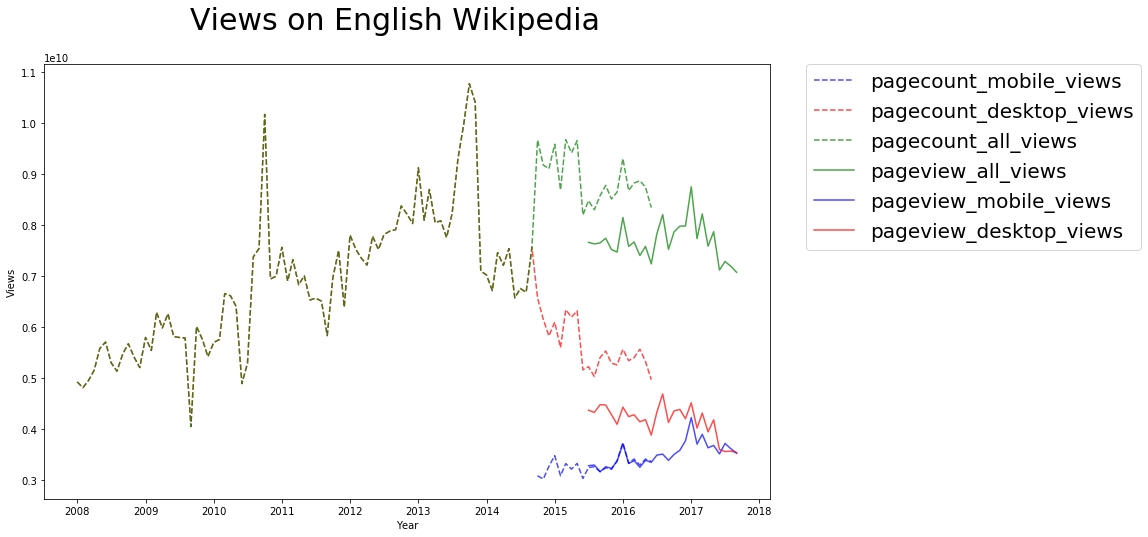

In [399]:
result = result.replace(0,np.nan)
fig, ax = plt.subplots()

date = pd.to_datetime(result.year + result.month, format = '%Y%m')
ax.plot(date, result['pagecount_mobile_views'], color = 'blue', linestyle = '--', alpha=0.7)
ax.plot(date, result['pagecount_desktop_views'], color = 'red', linestyle = '--', alpha=0.7)
ax.plot(date, result['pagecount_all_views'], color = 'green', linestyle = '--', alpha=0.7)
ax.plot(date, result['pageview_all_views'], color = 'green', alpha=0.7)
ax.plot(date, result['pageview_mobile_views'], color = 'blue', alpha=0.7)
ax.plot(date, result['pageview_desktop_views'], color = 'red', alpha=0.7)

fig.set_size_inches(13, 8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, prop={'size': 20}, borderaxespad=0.)
fig.suptitle('Views on English Wikipedia', fontsize=30)

ax.set_xlabel('Year')
ax.set_ylabel('Views')
plt.show()

Conclusion: from the visualization above, we could say that desktop views are hihger than mobile views forom the comparsion. Also, there are two peak points for all views, the first occured on oct 2010, and the second occured on oct 2013. 